## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

32.2042079685746
49.693428597180905


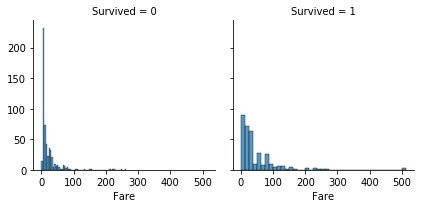

In [24]:
print(df_train['Fare'].mean()) #Fare平均
print(df_train['Fare'].std()) #Fare標準差
# 連續型用分布圖來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.histplot, 'Fare', kde=False)

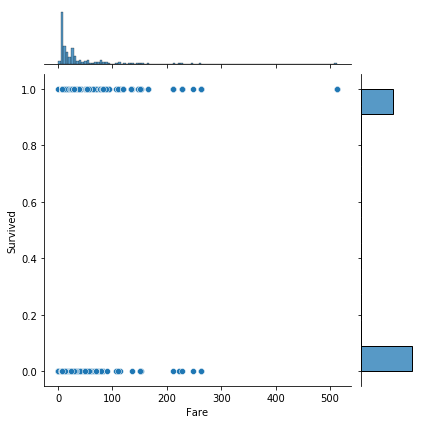

In [29]:
sns.jointplot(x="Fare", y="Survived", data=df_train)
#plt.scatter(x="Fare", y="Survived",data=df_train) 
#檢視票價與存活率:無相關

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [5]:
print(df_train['Fare'].describe())

#max與平均值:差距過大
#方法1中，也可以去查過往資料，鐵達票價的範圍，檢查上述的票價是否在販售範圍。

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [8]:
#若資料服從正態分佈：根據正態分佈的定義可知，距離平均值 3σ 之外的概率為 P(|x-μ|>3σ) ≦ 0.003
#這屬於極小概率事件，在預設情況下我們可以認定，距離超過平均值 3σ 的樣本是不存在的。
#因此，當樣本距離平均值大於 3σ，認為該樣本為異常值。

import numpy as np

# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

out_index=outliers_z_score(df_train['Fare'],3)
print(out_index[0])
print("用第二種方法的找出的 outlier 有哪些?")
print(df_train.loc[out_index[0],'Fare'])


[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
用第二種方法的找出的 outlier 有哪些?
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

In [9]:
import numpy as np
# 透過一個函數來判斷是否為異常值
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [15]:
out_index2=outliers_iqr(df_train['Fare'],2)
print(out_index2)
print("用第三種方法的找出的 outlier 有哪些?(2 倍IQR)")
print(df_train.loc[out_index2[0],'Fare'])
print(df_train.loc[out_index2[0],'Fare'].count())

(array([ 27,  31,  34,  61,  62,  88, 102, 118, 124, 139, 195, 215, 224,
       230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299,
       305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 337, 341, 373,
       375, 377, 380, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496,
       498, 504, 505, 520, 527, 537, 544, 550, 557, 558, 581, 585, 587,
       591, 609, 627, 659, 660, 679, 689, 698, 700, 708, 716, 730, 737,
       741, 742, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856,
       879], dtype=int64),)
用第三種方法的找出的 outlier 有哪些?(2 倍IQR)
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
88     263.0000
102     77.2875
118    247.5208
124     77.2875
139     79.2000
195    146.5208
215    113.2750
224     90.0000
230     83.4750
245     90.0000
256     79.2000
257     86.5000
258    512.3292
262     79.6500
268    153.4625
269    135.6333
275     77.9583
290     78.8500
291     91.0792
297    151.5500
299    247.5208
305    151.5500
306

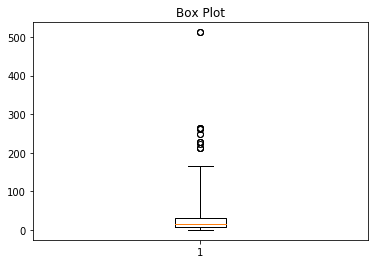

In [22]:
# 畫圖表, 更易理解數據分布
# 方法：利用matplotlib包中axes物件的boxplot()方法。， 透過 whis 來設定 IQR 的倍數
# 箱型圖: Q1: 第一四分位數, 中位數, Q3: 第三四分位數  IQR = Q3-Q1
#        最大值與最小值，為籬笆內的最大最小值。
#        超出籬笆外的定義為離群值/異常值。
#        籬笆: 由Q1往下取 1.5 X IQR   , 及Q3往上取  1.5 X IQR  

plt.boxplot(df_train['Fare'],whis=6)    #作圖

plt.title('Box Plot')
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


In [ ]:
因方法二: 異常值數量>20 , 看起來是票價高低頗有差距的關係, 不算真的異常, 故不須處理
需有業務面的資訊可以輔助判斷: 票價是否在販售範圍內